In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns
# plt.style.use('seaborn')
%matplotlib inline

In [120]:
df = pd.read_csv('log.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df['e1'] = (df['prediction1'] - df['output1'])/df['output1']
df['e2'] = (df['prediction2'] - df['output2'])/df['output2']

In [121]:
def boot(df, x, y, intervals, sigma_index):
    '''
    This function computes the average and std of intervals.
    df--> DataFrame
    x--> label
    y--> error
    intervals--> intervals
    sigma_index--> specifies the number of sigma for confidence interval; for example 1 sigma-->69%, 2 sigma-->95%, ... 
    
    '''
    

    df.sort_values(by = x, inplace = True)
    df['group'] = pd.cut(df[x], bins = intervals)
    bins = df.groupby(df.group).mean()
    std_bins = df.groupby(df.group).std()
    bins['upper_'+ y] = bins[y] + np.abs(sigma_index * std_bins[y])
    bins['lower_'+ y] = bins[y] - np.abs(sigma_index * std_bins[y])
    
   
    return bins

In [122]:
def bin_numbers(x):
    '''
    This function creates different intervals used in plot smoothing function
    '''
    number_bins = [500, 1000, 2000, 4000, 6500, 10000]
    for p in range(x//10000):
        number_bins.append(10000*(p+2))
    
    return number_bins

In [123]:
def bin_numbers_exp(x):
    '''
    This function creates exponential intervals used in plot smoothing function
    '''
    number = np.int(np.log2(x)) + 1
    number_bins = []
    for p in range(number + 1):
        number_bins.append(2**p)
    return number_bins

In [124]:
def CI_visualization(df = df, x_lim = [0, 100000] , y_lim = [-0.5, 0.5], x_label = 'output1', output = 'output1',\
                     scatter_color = 'lightsalmon', c1 = 'navy', c2 = 'steelblue', c3 = 'skyblue',  error = 'e1',\
                     max_range = 100000):
    '''
    This funciton visulaizes the computed interval average, upper limits, and lower limits.
    
    ''' 
    data1 = boot(df, x = output, y = error, intervals = bin_numbers(max_range), sigma_index =  1).dropna()
    data2 = boot(df, x = output, y = error, intervals = bin_numbers(max_range), sigma_index =  2).dropna()
    
    
    
    X_Y_average = make_interp_spline(data1[output], data1[error])
    
    X_Y_upper = make_interp_spline(data1[output], data1['upper_' + error])
    X_Y_lower = make_interp_spline(data1[output], data1['lower_' + error])
    
    X_Y_upper2 = make_interp_spline(data2[output], data2['upper_' + error])
    X_Y_lower2 = make_interp_spline(data2[output], data2['lower_' + error])
    
    
    
    X_1 = np.linspace(data1[output].min(), data1[output].max(), 500)
    X_2 = np.linspace(data2[output].min(), data2[output].max(), 500)

    

    Y_average = X_Y_average(X_1)
    Y_upper = X_Y_upper(X_1)
    Y_lower = X_Y_lower(X_1)
    Y_upper2 = X_Y_upper2(X_2)
    Y_lower2 = X_Y_lower2(X_2)
       
 
    plt.figure(figsize = (6,6), facecolor = (1, 1, 1))
    
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    
    
    
    plt.xlabel(x_label, fontname="Arial", fontsize=16)
    plt.ylabel('Percentage error', fontname="Arial", fontsize=16)
    
    plt.scatter(df[output],df[error], facecolors='none', edgecolors= scatter_color, s = 3, alpha=0.6)
    
    plt.plot(X_1, Y_average, c = c1, lw = 2)
    
    plt.plot(X_1, Y_upper, c = c2, lw = 2)
    plt.plot(X_1, Y_lower, c = c2, lw = 2)
    
    plt.plot(X_2, Y_upper2, c = c3, lw = 2)
    plt.plot(X_2, Y_lower2, c = c3, lw = 2)

    
    kwargs1 = {'color':c2, 'alpha':0.3}
    plt.fill_between(X_1, Y_upper, Y_lower, **kwargs1)
    
    kwargs2 = {'color':c3, 'alpha':0.3}
    plt.fill_between(X_2, Y_upper2, Y_lower2, **kwargs2)
    
    plt.grid()

    plt.tight_layout()
    plt.savefig(output+'.png', dpi = 300)


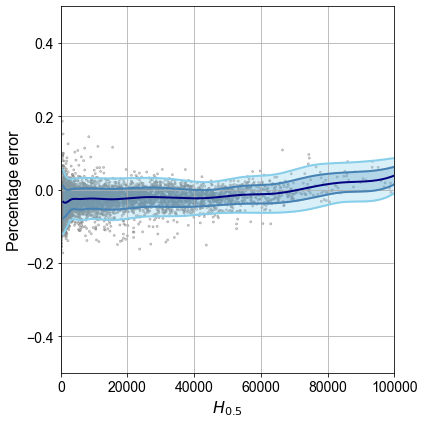

In [125]:
CI_visualization(df = df, x_lim = [0, 100000] , y_lim = [-0.5, 0.5], x_label = r'$H_{0.5}$', output = 'output1',\
                 scatter_color = 'grey', c1 = 'navy', c2 = 'steelblue', c3 = 'skyblue',  error = 'e1',\
                 max_range = 100000)

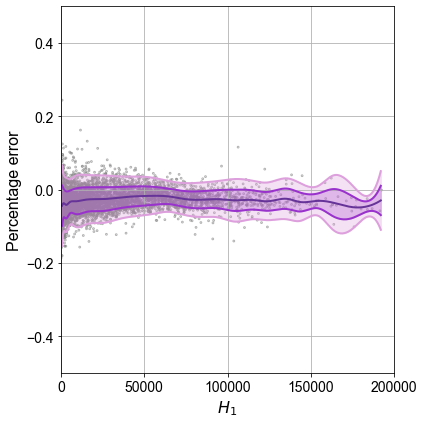

In [126]:
CI_visualization(df = df, x_lim = [0, 200000], x_label = r'$H_{1}$', output = 'output2',\
                 scatter_color = 'grey', c1 = 'rebeccapurple', c2 = 'darkorchid',\
                 c3 = 'plum',  error = 'e2', max_range = 200000)

# Untransformed

In [127]:
df = pd.read_csv('log.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

df = df.apply(lambda x: np.log(x))

df['e1'] = ((df['prediction1'] - df['output1'])/df['output1'])*100
df['e2'] = ((df['prediction2'] - df['output2'])/df['output2'])*100

In [128]:
print(f'Output 1 error = {df["e1"].mean() *100}')
print(f'Output 2 error = {df["e2"].mean() *100}')

Output 1 error = -30.248035033362626
Output 2 error = -32.90508544313435


In [129]:
df.head()

,output1,prediction1,output2,prediction2,e1,e2
0,10.898641,10.887865,11.498964,11.473790,-0.098871,-0.218925
1,7.420130,7.348000,7.879383,7.829417,-0.972082,-0.634140
2,7.437503,7.420153,7.976089,7.988345,-0.233280,0.153655
3,9.920235,9.897570,10.451682,10.457683,-0.228473,0.057413
4,9.819259,9.670259,10.280716,10.245021,-1.517419,-0.347204


In [130]:
def CI_visualization_intermediate(df = df, x_lim = [0, 20] , y_lim = [-0.5, 0.5], x_label = 'output1', output = 'output1',\
                                      scatter_color = 'lightsalmon', c1 = 'navy', c2 = 'steelblue', c3 = 'skyblue',\
                                          error = 'e1',):
    '''
    This funciton visulaizes the computed interval average, upper limits, and lower limits.
    
    ''' 
    data1 = boot(df, x = output, y = error, intervals = 20, sigma_index =  1).dropna()
    data2 = boot(df, x = output, y = error, intervals = 20, sigma_index =  2).dropna()
    
    
    
    X_Y_average = make_interp_spline(data1[output], data1[error])
    
    X_Y_upper = make_interp_spline(data1[output], data1['upper_' + error])
    X_Y_lower = make_interp_spline(data1[output], data1['lower_' + error])
    
    X_Y_upper2 = make_interp_spline(data2[output], data2['upper_' + error])
    X_Y_lower2 = make_interp_spline(data2[output], data2['lower_' + error])
    
    
    
    X_1 = np.linspace(data1[output].min(), data1[output].max(), 500)
    X_2 = np.linspace(data2[output].min(), data2[output].max(), 500)

    

    Y_average = X_Y_average(X_1)
    Y_upper = X_Y_upper(X_1)
    Y_lower = X_Y_lower(X_1)
    Y_upper2 = X_Y_upper2(X_2)
    Y_lower2 = X_Y_lower2(X_2)
       
 
    plt.figure(figsize = (6,3), facecolor = (1, 1, 1))
    
    
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    
    
    
    plt.xlabel(x_label, fontname="Arial", fontsize=16)
    plt.ylabel('percentage error', fontname="Arial", fontsize=16)
    
    plt.scatter(df[output],df[error], facecolors='none', edgecolors= scatter_color, s = 3, alpha=0.6)
    
    plt.plot(X_1, Y_average, c = c1, lw = 2)
    
    plt.plot(X_1, Y_upper, c = c2, lw = 2)
    plt.plot(X_1, Y_lower, c = c2, lw = 2)
    
    plt.plot(X_2, Y_upper2, c = c3, lw = 2)
    plt.plot(X_2, Y_lower2, c = c3, lw = 2)

    
    kwargs1 = {'color':c2, 'alpha':0.3}
    plt.fill_between(X_1, Y_upper, Y_lower, **kwargs1)
    
    kwargs2 = {'color':c3, 'alpha':0.3}
    plt.fill_between(X_2, Y_upper2, Y_lower2, **kwargs2)
    
    plt.grid()

    plt.tight_layout()
    plt.savefig(output+'_intermediate.png', dpi = 300)


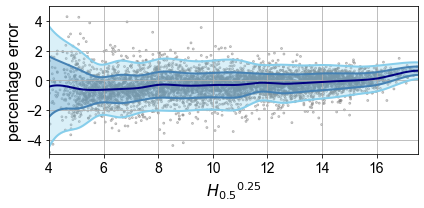

In [111]:
CI_visualization_intermediate(df = df, x_lim = [4, 17.5] , y_lim = [-5, 5], x_label = r'${H_{0.5}}^{0.25}$',\
                              output = 'output1',scatter_color = 'grey', c1 = 'navy', c2 = 'steelblue',\
                              c3 = 'skyblue',  error = 'e1')

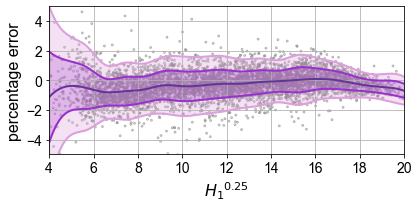

In [112]:
CI_visualization_intermediate(df = df, x_lim = [4, 20], y_lim= [-5,5], x_label = r'${H_{1}}^{0.25}$', output = 'output2',\
                 scatter_color = 'grey', c1 = 'rebeccapurple', c2 = 'darkorchid',\
                 c3 = 'plum',  error = 'e2')

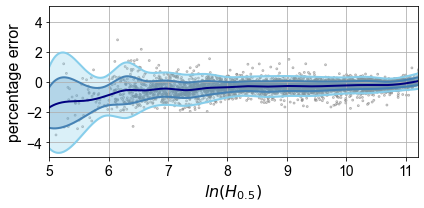

In [135]:
CI_visualization_intermediate(df = df, x_lim = [5, 11.2] , y_lim = [-5, 5], x_label = r'${ln(H_{0.5})}$',\
                              output = 'output1',scatter_color = 'grey', c1 = 'navy', c2 = 'steelblue',\
                              c3 = 'skyblue',  error = 'e1')

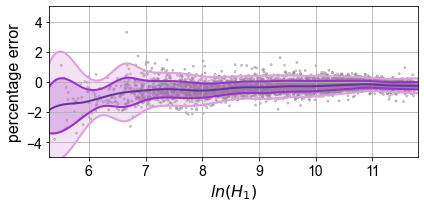

In [138]:
CI_visualization_intermediate(df = df, x_lim = [5.3, 11.8], y_lim= [-5,5], x_label = r'${ln(H_{1})}$', output = 'output2',\
                 scatter_color = 'grey', c1 = 'rebeccapurple', c2 = 'darkorchid',\
                 c3 = 'plum',  error = 'e2')